In [3]:
from time import time
import unittest
import numpy as np
from sklearn.metrics import silhouette_score

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import VAE, ConvVAE

importing Jupyter notebook from ../module/autoencoder.ipynb


In [4]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
numClass = 10
sizeDigit = xTrain.shape[1:]

dimInput = [*xTrain.shape[1:], 1]
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

11493376/11490434 [==============================] - 7s 1us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Default parameters

In [6]:
modelPath = '../model/temp/'
convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.2289 - val_loss: 0.2094

Epoch 00001: val_loss improved from inf to 0.20938, saving model to ../model/temp/Conv_AutoEncoder.01-0.23-0.21.hdf5
Epoch 2/50
60000/60000 [==============================] - 13s 210us/step - loss: 0.2060 - val_loss: 0.2034

Epoch 00002: val_loss improved from 0.20938 to 0.20345, saving model to ../model/temp/Conv_AutoEncoder.02-0.21-0.20.hdf5
Epoch 3/50
60000/60000 [==============================] - 13s 211us/step - loss: 0.2015 - val_loss: 0.1995

Epoch 00003: val_loss improved from 0.20345 to 0.19947, saving model to ../model/temp/Conv_AutoEncoder.03-0.20-0.20.hdf5
Epoch 4/50
60000/60000 [==============================] - 13s 213us/step - loss: 0.1986 - val_loss: 0.1977

Epoch 00004: val_loss improved from 0.19947 to 0.19771, saving model to ../model/temp/Conv_AutoEncoder.04-0.20-0.20.hdf5
Epoch 5/50
60000/60000 [==============

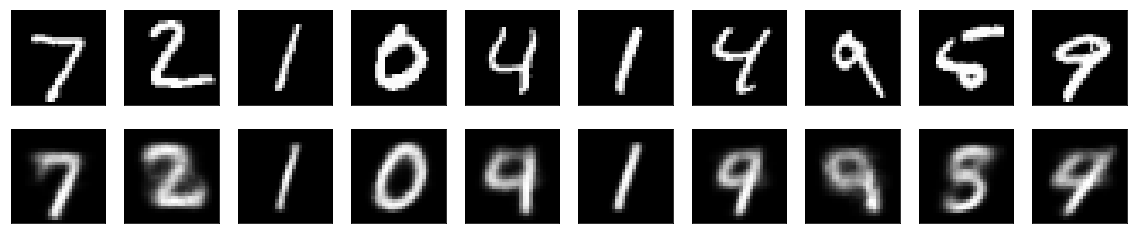

0.19749302


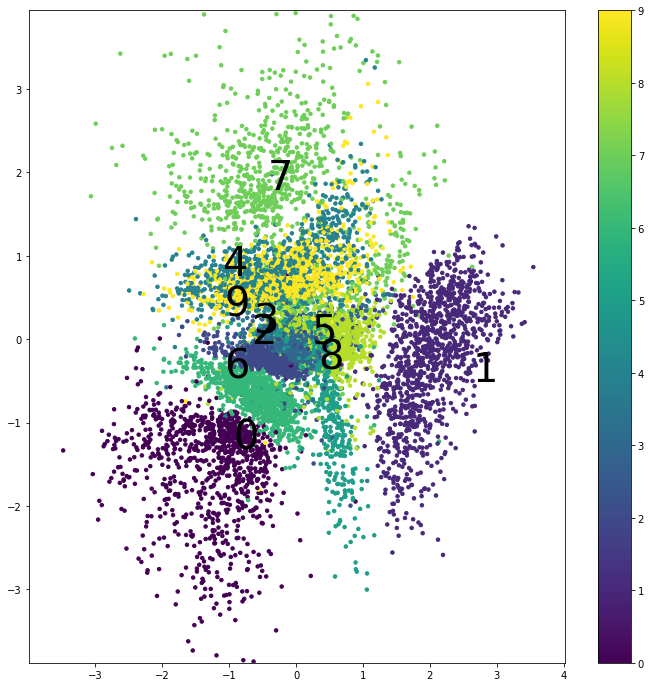

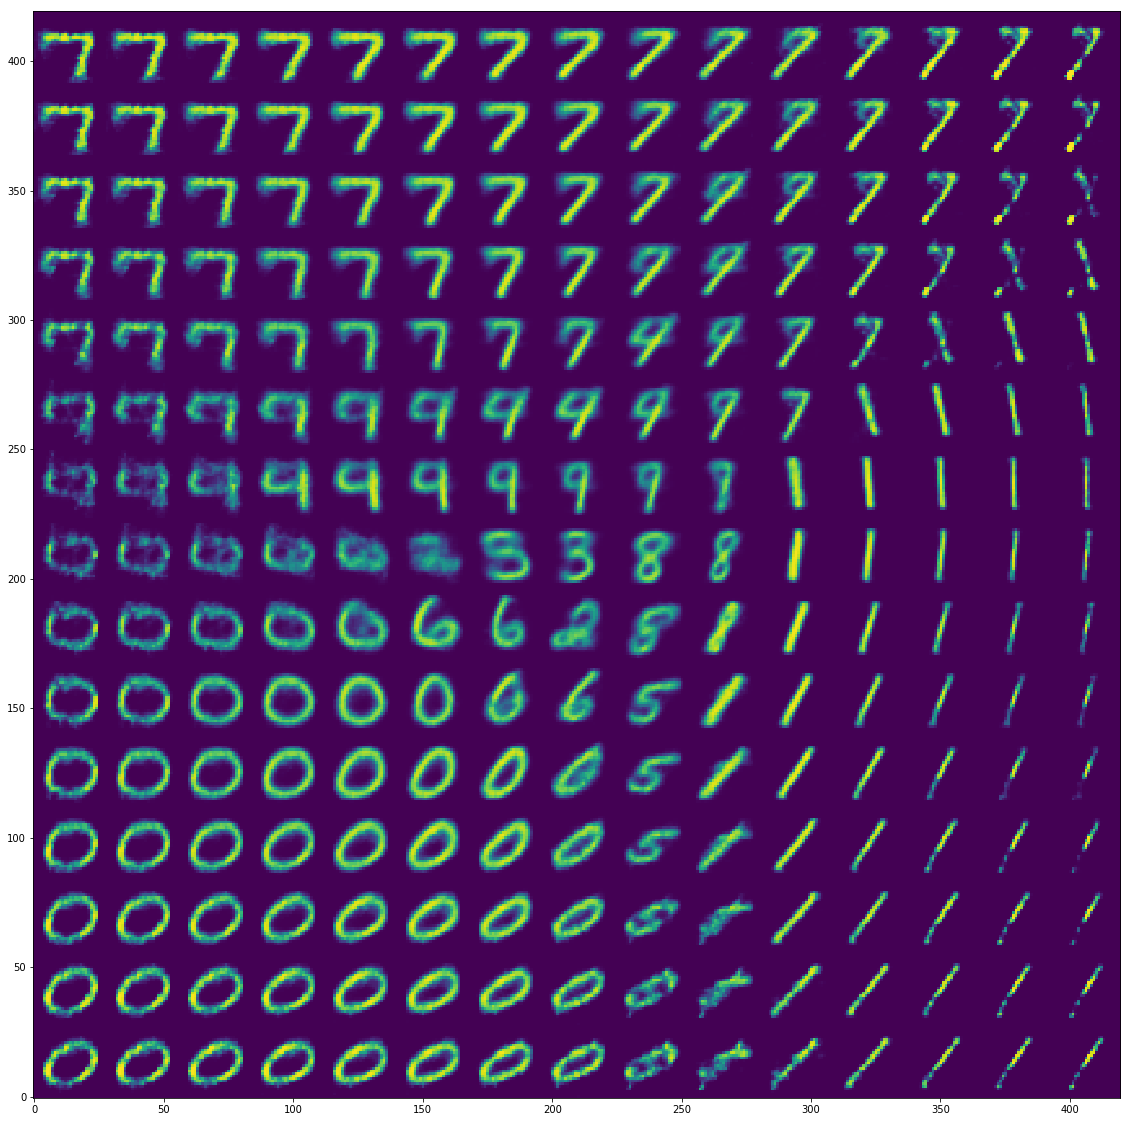

In [8]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Another parameter setting

In [2]:
numEpochs = 100
sizeBatch = 32
sizeKernel = 3
ratRecon = 1
nameOptim = 'adam'
modelPath = '../model/temp/'
patience = 3


convVAE = ConvVAE(dimInput, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 265us/step - loss: 0.2345 - val_loss: 0.2020

Epoch 00001: val_loss improved from inf to 0.20201, saving model to ../model/temp/Conv_AutoEncoder.01-0.23-0.20.hdf5
Epoch 2/100
60000/60000 [==============================] - 14s 238us/step - loss: 0.1965 - val_loss: 0.1924

Epoch 00002: val_loss improved from 0.20201 to 0.19241, saving model to ../model/temp/Conv_AutoEncoder.02-0.20-0.19.hdf5
Epoch 3/100
60000/60000 [==============================] - 14s 239us/step - loss: 0.1898 - val_loss: 0.1893

Epoch 00003: val_loss improved from 0.19241 to 0.18929, saving model to ../model/temp/Conv_AutoEncoder.03-0.19-0.19.hdf5
Epoch 4/100
60000/60000 [==============================] - 14s 241us/step - loss: 0.1863 - val_loss: 0.1844

Epoch 00004: val_loss improved from 0.18929 to 0.18439, saving model to ../model/temp/Conv_AutoEncoder.04-0.19-0.18.h

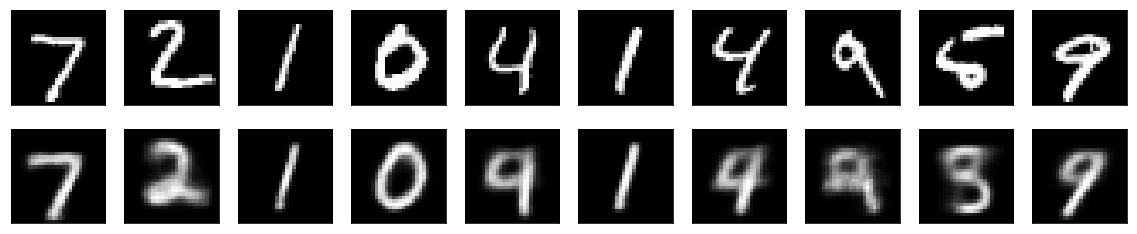

0.19688958


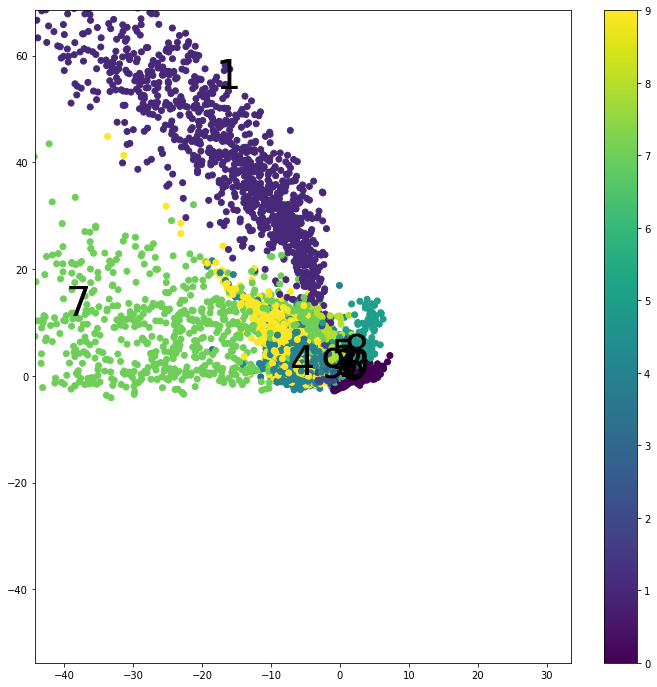

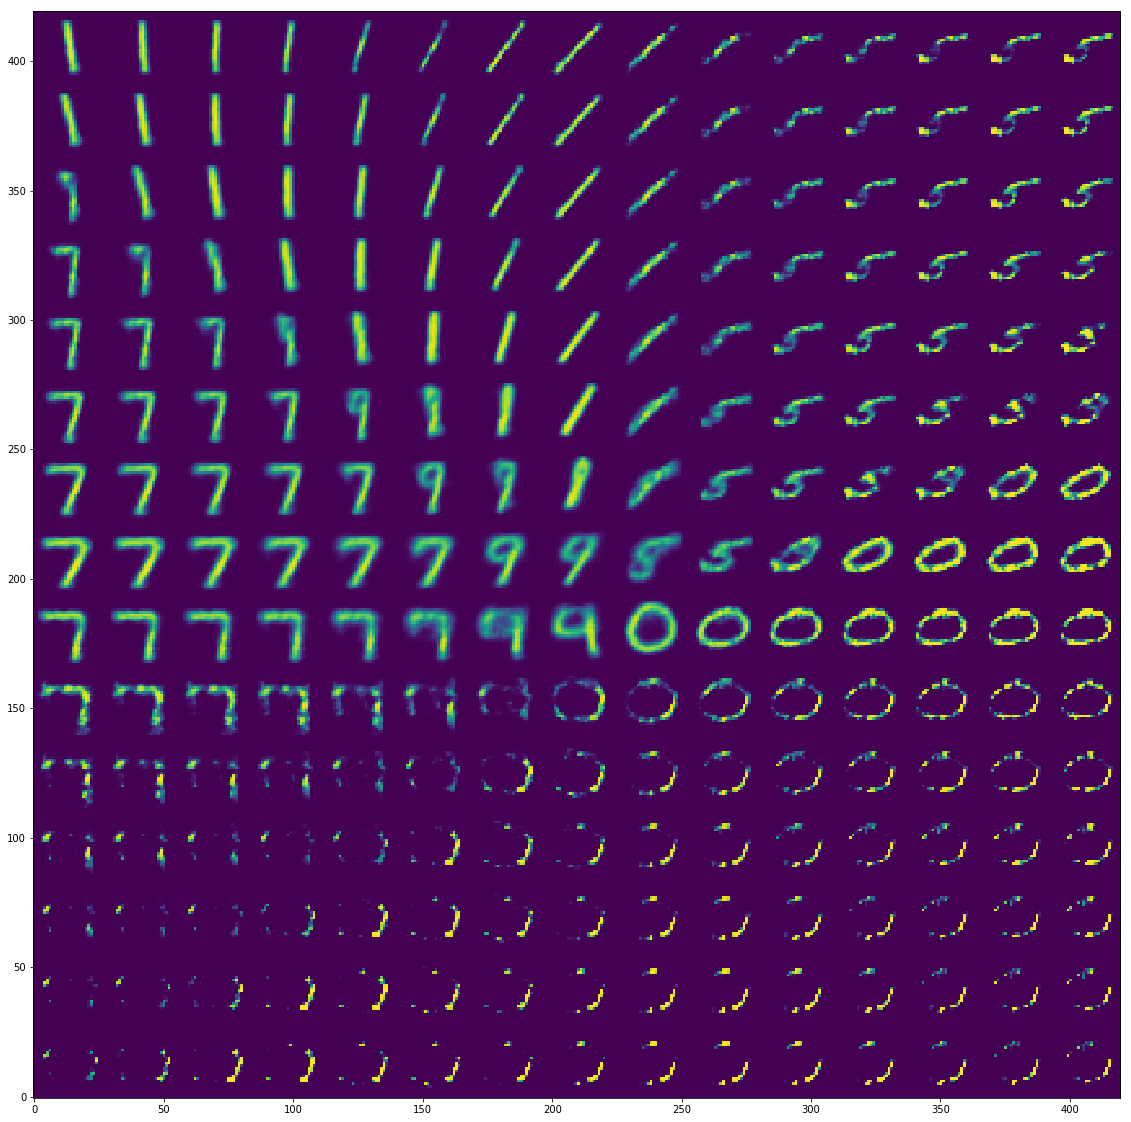

In [3]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Deeper for dense and convolutional layers

In [4]:
layerDense = [64, 16, 4]
layerConv=[8, 32]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 272us/step - loss: 0.1895 - val_loss: 0.1608

Epoch 00001: val_loss improved from inf to 0.16079, saving model to ../model/temp/Conv_AutoEncoder.01-0.19-0.16.hdf5
Epoch 2/100
60000/60000 [==============================] - 15s 254us/step - loss: 0.1571 - val_loss: 0.1541

Epoch 00002: val_loss improved from 0.16079 to 0.15408, saving model to ../model/temp/Conv_AutoEncoder.02-0.16-0.15.hdf5
Epoch 3/100
60000/60000 [==============================] - 15s 256us/step - loss: 0.1521 - val_loss: 0.1505

Epoch 00003: val_loss improved from 0.15408 to 0.15047, saving model to ../model/temp/Conv_AutoEncoder.03-0.15-0.15.hdf5
Epoch 4/100
60000/60000 [==============================] - 15s 254us/step - loss: 0.1492 - val_loss: 0.1495

Epoch 00004: val_loss improved from 0.15047 to 0.14946, saving model to ../model/temp/Conv_AutoEncoder.04-0.15-0.15.hdf5
Epoch 5/100
60000/60000 [=========

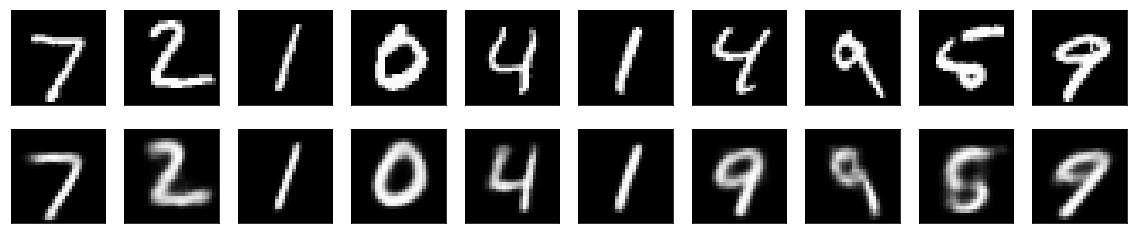

0.16252458


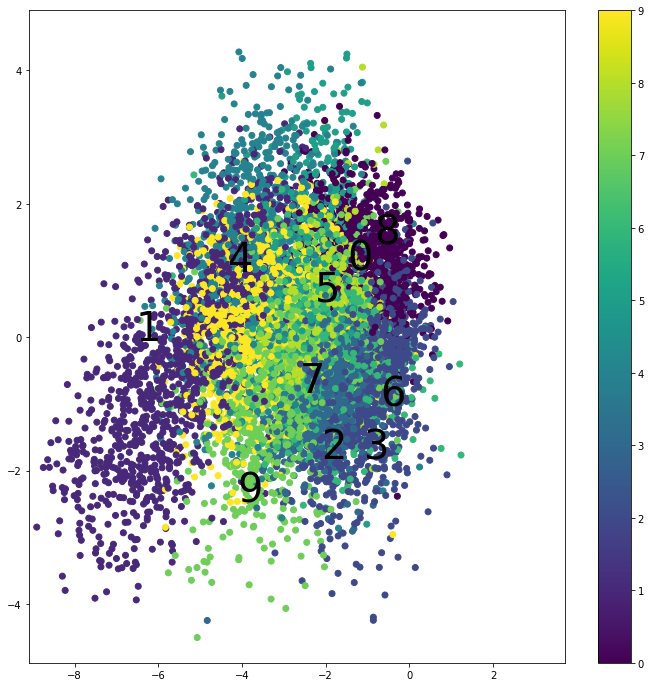

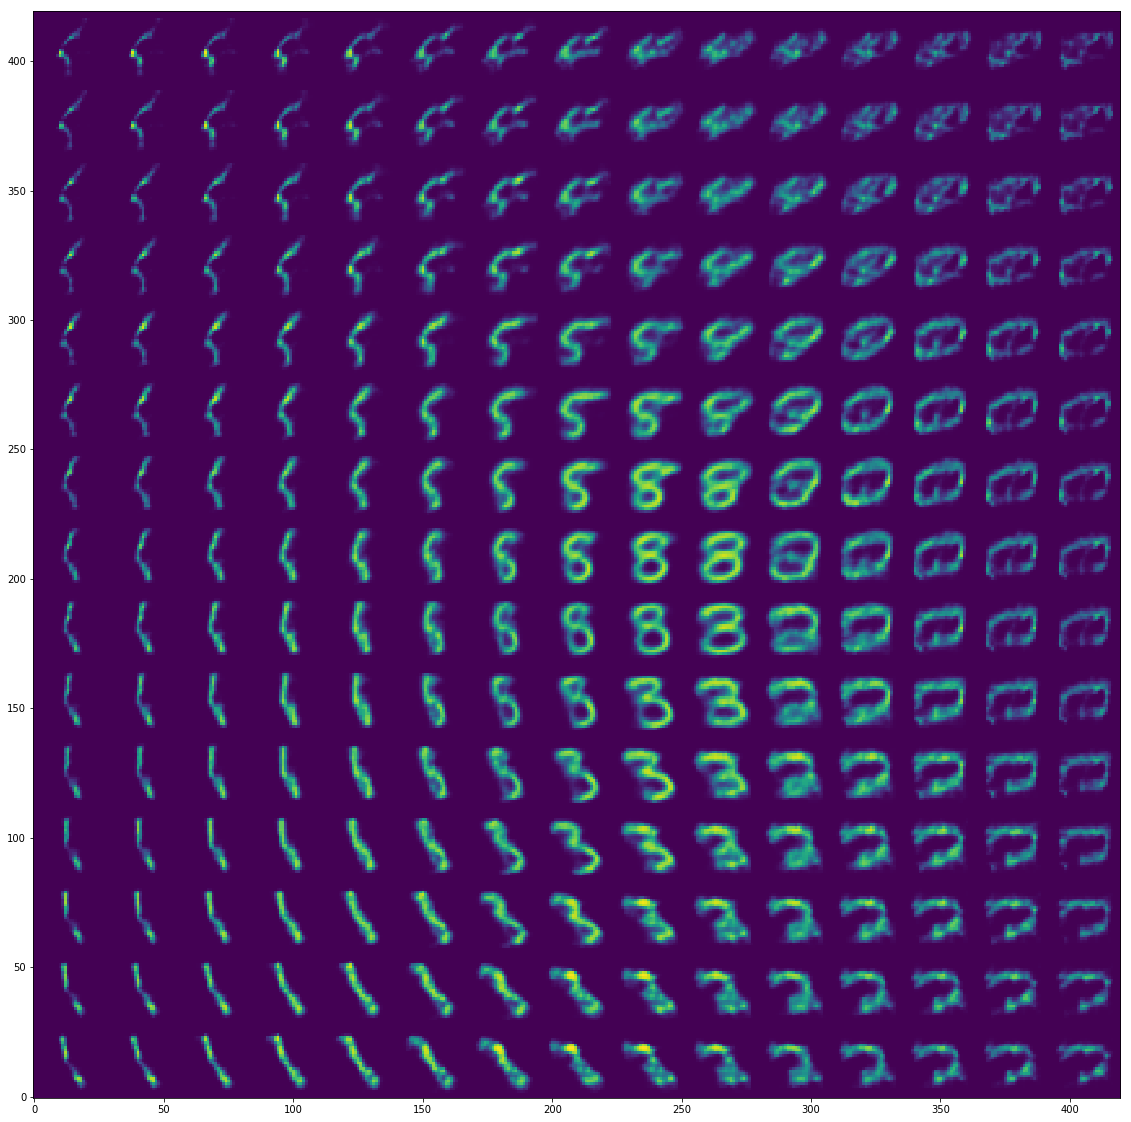

In [5]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

In [6]:
layerDense = [256, 64, 16, 4]
layerConv=[8, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 18s 293us/step - loss: 0.1868 - val_loss: 0.1544

Epoch 00001: val_loss improved from inf to 0.15437, saving model to ../model/temp/Conv_AutoEncoder.01-0.19-0.15.hdf5
Epoch 2/100
60000/60000 [==============================] - 17s 277us/step - loss: 0.1493 - val_loss: 0.1465

Epoch 00002: val_loss improved from 0.15437 to 0.14650, saving model to ../model/temp/Conv_AutoEncoder.02-0.15-0.15.hdf5
Epoch 3/100
60000/60000 [==============================] - 17s 275us/step - loss: 0.1439 - val_loss: 0.1429

Epoch 00003: val_loss improved from 0.14650 to 0.14289, saving model to ../model/temp/Conv_AutoEncoder.03-0.14-0.14.hdf5
Epoch 4/100
60000/60000 [==============================] - 17s 277us/step - loss: 0.1409 - val_loss: 0.1406

Epoch 00004: val_loss improved from 0.14289 to 0.14063, saving model to ../model/temp/Conv_AutoEncoder.04-0.14-0.14.hdf5
Epoch 5/100
60000/60000 [=========

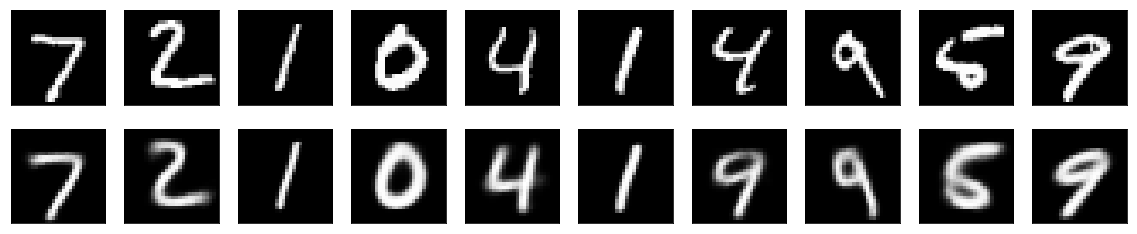

0.1540873


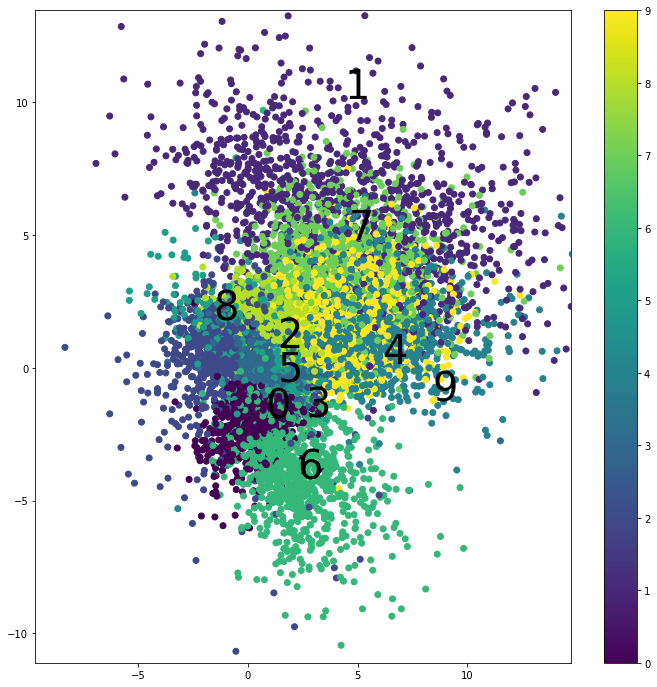

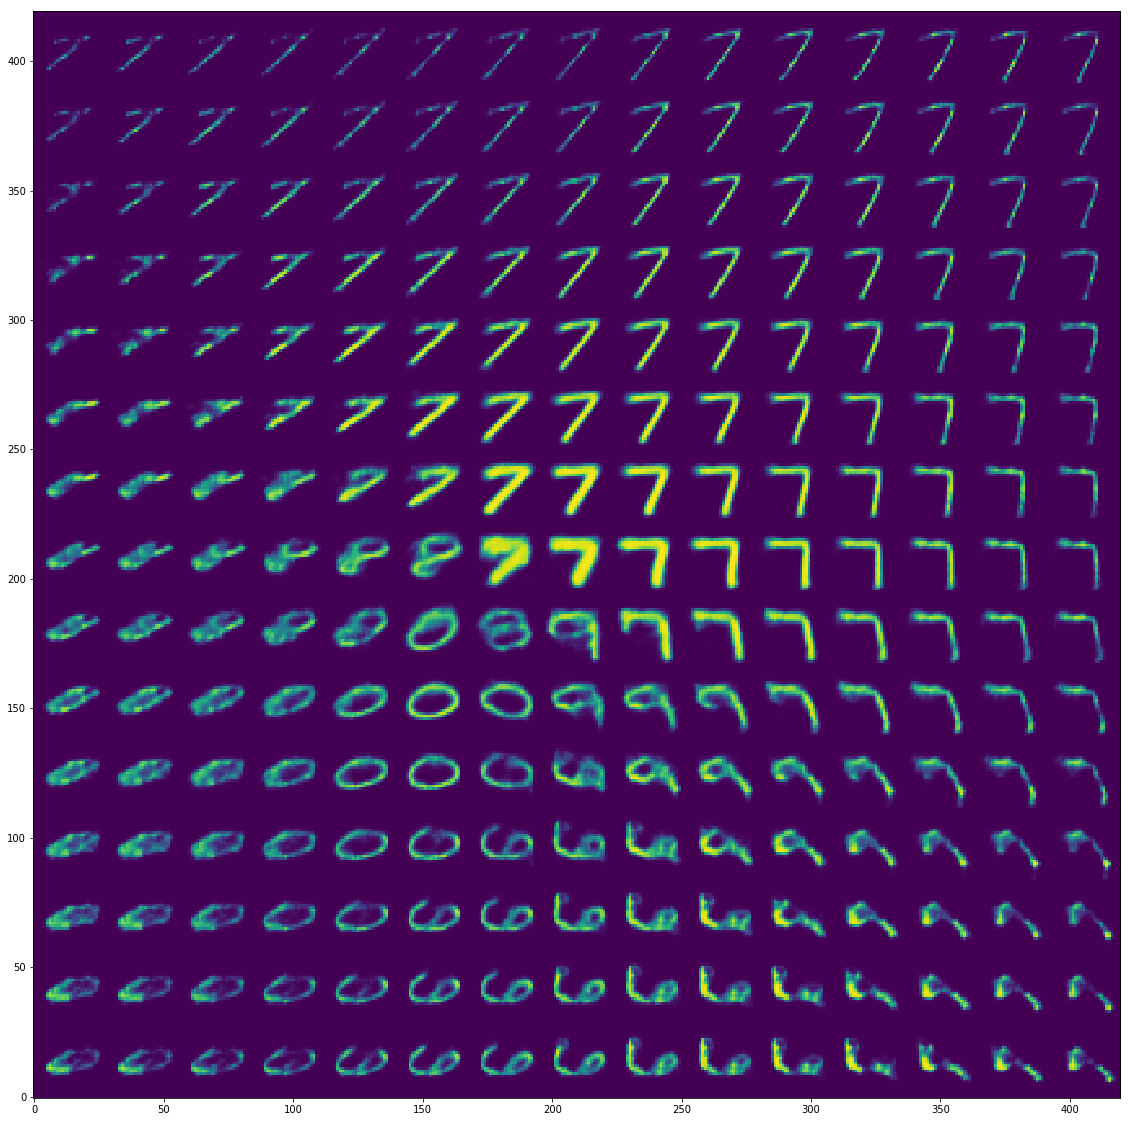

In [7]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

In [8]:
encoder.summary()
decoder.summary()
convVAE.autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 8)    80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 64)     4672        conv2d_5[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 3136)         0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dense_13 (

In [9]:
layerDense = [128, 32, 8, 2]
layerConv=[8, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 18s 305us/step - loss: 0.2187 - val_loss: 0.1929

Epoch 00001: val_loss improved from inf to 0.19287, saving model to ../model/temp/Conv_AutoEncoder.01-0.22-0.19.hdf5
Epoch 2/100
60000/60000 [==============================] - 17s 279us/step - loss: 0.1872 - val_loss: 0.1830

Epoch 00002: val_loss improved from 0.19287 to 0.18302, saving model to ../model/temp/Conv_AutoEncoder.02-0.19-0.18.hdf5
Epoch 3/100
60000/60000 [==============================] - 17s 276us/step - loss: 0.1805 - val_loss: 0.1785

Epoch 00003: val_loss improved from 0.18302 to 0.17848, saving model to ../model/temp/Conv_AutoEncoder.03-0.18-0.18.hdf5
Epoch 4/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.1772 - val_loss: 0.1766

Epoch 00004: val_loss improved from 0.17848 to 0.17658, saving model to ../model/temp/Conv_AutoEncoder.04-0.18-0.18.hdf5
Epoch 5/100
60000/60000 [=========

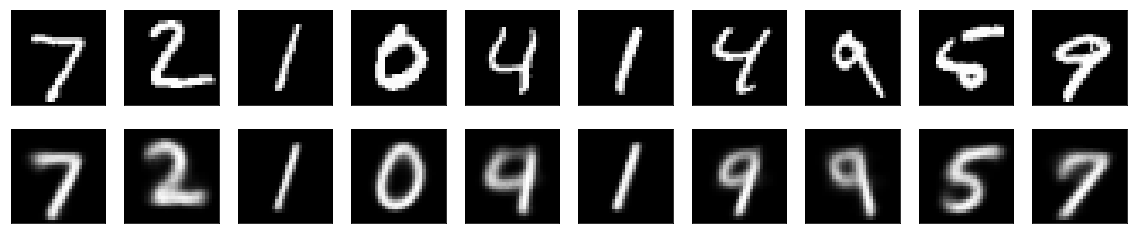

0.1894081


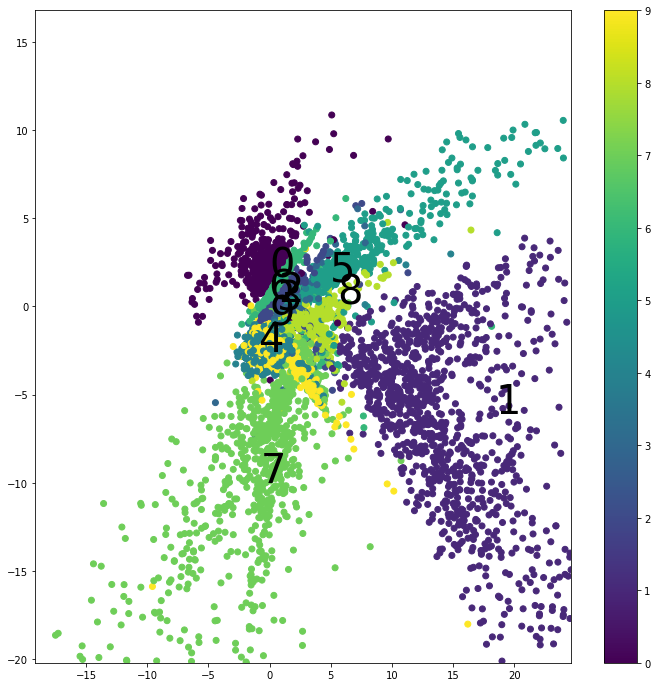

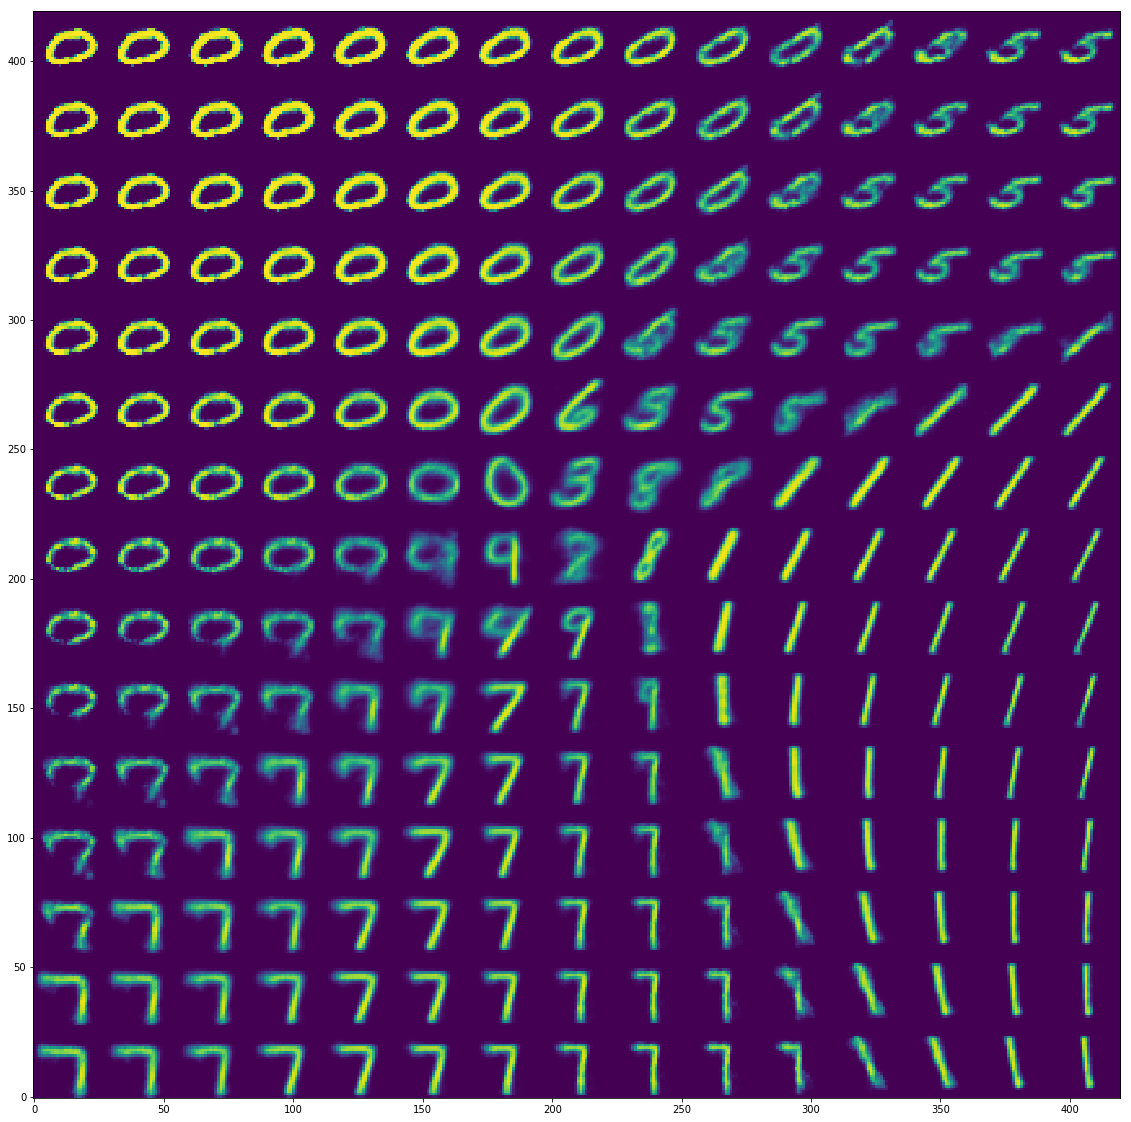

In [10]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

In [11]:
layerDense = [128, 32, 8, 2]
layerConv = [8, 64]
ratRecon = 0.999

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 288us/step - loss: 0.2190 - val_loss: 0.1981

Epoch 00001: val_loss improved from inf to 0.19810, saving model to ../model/temp/Conv_AutoEncoder.01-0.22-0.20.hdf5
Epoch 2/100
60000/60000 [==============================] - 16s 271us/step - loss: 0.1942 - val_loss: 0.1918

Epoch 00002: val_loss improved from 0.19810 to 0.19179, saving model to ../model/temp/Conv_AutoEncoder.02-0.19-0.19.hdf5
Epoch 3/100
60000/60000 [==============================] - 16s 272us/step - loss: 0.1887 - val_loss: 0.1872

Epoch 00003: val_loss improved from 0.19179 to 0.18717, saving model to ../model/temp/Conv_AutoEncoder.03-0.19-0.19.hdf5
Epoch 4/100
60000/60000 [==============================] - 17s 275us/step - loss: 0.1860 - val_loss: 0.1860

Epoch 00004: val_loss improved from 0.18717 to 0.18598, saving model to ../model/temp/Conv_AutoEncoder.04-0.19-0.19.hdf5
Epoch 5/100
60000/60000 [=========